<a href="https://colab.research.google.com/github/zwarshavsky/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/Zhenya_Warshavsky_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
!curl https://raw.githubusercontent.com/zwarshavsky/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv | head -n 10
# !curl https://raw.githubusercontent.com/zwarshavsky/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182
5,58,103,165
6,55,161,107
7,21,188,37
8,55,216,79
 58 17574   58 10200    0     0  77272      0 --:--:-- --:--:-- --:--:-- 77272
curl: (23) Failed writing body (751 != 2759)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#function for dataframe stats

def df_stats(dataframe):
    try:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe(),dataframe.describe(exclude="number"))
    except:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe())



# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
df = pd.read_csv("https://raw.githubusercontent.com/zwarshavsky/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv")


df = df.drop(columns=["Unnamed: 0"])
df_stats(df)



(1200, 3)

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


age              0
weight           0
exercise_time    0
dtype: int64

age              int64
weight           int64
exercise_time    int64
dtype: object

age              1200
weight           1200
exercise_time    1200
dtype: int64

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


*Try to predict person's weight. In data set it is not super clear what is the most interesting thing. 
*Exercise time is in minutes/week of exercise 
*Do some research on pivot tables in this assignment.

In [3]:
from collections import namedtuple

User = namedtuple('User', ['age','weight', 'exercise_time'])

example_user = User(18, 140, 65)
print(example_user)

User(age=18, weight=140, exercise_time=65)


In [4]:
pd.__version__

'0.23.4'

In [0]:
# !pip install pandas==0.23.4

In [20]:
age_bins = pd.cut(df['age'], 4)  # 4 equal-sized bins
exercise_bins = pd.cut(df['exercise_time'], 4)  # 4 equal-sized bins
weight_bins = pd.cut(df['weight'], 4)  # 4 equal-sized bins


crosstab = pd.crosstab(exercise_bins,weight_bins, normalize='columns')
df_stats(crosstab)

(4, 4)

weight,"(99.854, 136.5]","(136.5, 173.0]","(173.0, 209.5]","(209.5, 246.0]"
exercise_time,,,,
"(-0.3, 75.0]",0.180617,0.224181,0.422925,0.802083
"(75.0, 150.0]",0.220264,0.292191,0.430830,0.197917
"(150.0, 225.0]",0.264317,0.261965,0.146245,0.000000
"(225.0, 300.0]",0.334802,0.221662,0.000000,0.000000


weight
(99.854, 136.5]    0
(136.5, 173.0]     0
(173.0, 209.5]     0
(209.5, 246.0]     0
dtype: int64

weight
(99.854, 136.5]    float64
(136.5, 173.0]     float64
(173.0, 209.5]     float64
(209.5, 246.0]     float64
dtype: object

weight
(99.854, 136.5]    4
(136.5, 173.0]     4
(173.0, 209.5]     4
(209.5, 246.0]     4
dtype: int64

weight,"(99.854, 136.5]","(136.5, 173.0]","(173.0, 209.5]","(209.5, 246.0]"
count,4.000000,4.000000,4.000000,4.000000
mean,0.250000,0.250000,0.250000,0.250000
std,0.066067,0.033630,0.212813,0.379697
min,0.180617,0.221662,0.000000,0.000000
25%,0.210352,0.223552,0.109684,0.000000
50%,0.242291,0.243073,0.284585,0.098958
75%,0.281938,0.269521,0.424901,0.348958
max,0.334802,0.292191,0.430830,0.802083


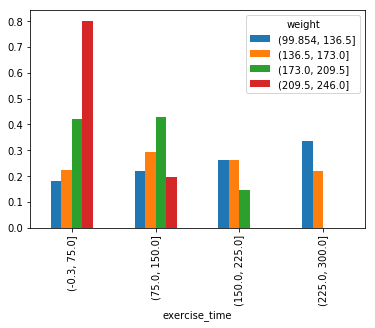

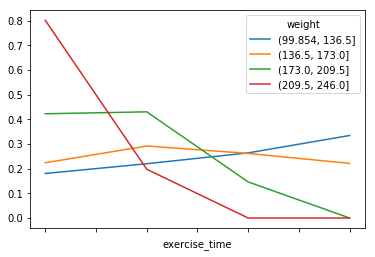

In [23]:
crosstab.plot(kind = "bar");

#the line chart does an excellent job of revealing the relationship between exercise time and weight. As weight increases, exercise time decreases. 
#the counding variable could tell a different story
crosstab.plot();

In [24]:
crosstab2 = pd.crosstab(age_bins,weight_bins, normalize='columns')
df_stats(crosstab2)

(4, 4)

weight,"(99.854, 136.5]","(136.5, 173.0]","(173.0, 209.5]","(209.5, 246.0]"
age,,,,
"(17.938, 33.5]",0.275330,0.309824,0.205534,0.218750
"(33.5, 49.0]",0.297357,0.234257,0.237154,0.177083
"(49.0, 64.5]",0.237885,0.214106,0.249012,0.208333
"(64.5, 80.0]",0.189427,0.241814,0.308300,0.395833


weight
(99.854, 136.5]    0
(136.5, 173.0]     0
(173.0, 209.5]     0
(209.5, 246.0]     0
dtype: int64

weight
(99.854, 136.5]    float64
(136.5, 173.0]     float64
(173.0, 209.5]     float64
(209.5, 246.0]     float64
dtype: object

weight
(99.854, 136.5]    4
(136.5, 173.0]     4
(173.0, 209.5]     4
(209.5, 246.0]     4
dtype: int64

weight,"(99.854, 136.5]","(136.5, 173.0]","(173.0, 209.5]","(209.5, 246.0]"
count,4.000000,4.000000,4.000000,4.000000
mean,0.250000,0.250000,0.250000,0.250000
std,0.047259,0.041562,0.042981,0.098821
min,0.189427,0.214106,0.205534,0.177083
25%,0.225771,0.229219,0.229249,0.200521
50%,0.256608,0.238035,0.243083,0.213542
75%,0.280837,0.258816,0.263834,0.263021
max,0.297357,0.309824,0.308300,0.395833


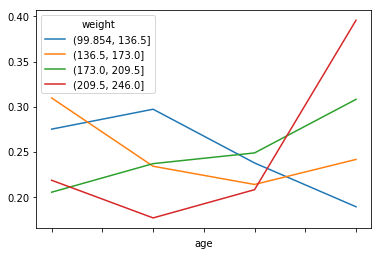

In [25]:
crosstab2.plot();

(4, 4)

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
exercise_time,,,,
"(-0.3, 75.0]",0.242991,0.229508,0.250000,0.463087
"(75.0, 150.0]",0.227414,0.252459,0.264493,0.406040
"(150.0, 225.0]",0.277259,0.232787,0.231884,0.124161
"(225.0, 300.0]",0.252336,0.285246,0.253623,0.006711


age
(17.938, 33.5]    0
(33.5, 49.0]      0
(49.0, 64.5]      0
(64.5, 80.0]      0
dtype: int64

age
(17.938, 33.5]    float64
(33.5, 49.0]      float64
(49.0, 64.5]      float64
(64.5, 80.0]      float64
dtype: object

age
(17.938, 33.5]    4
(33.5, 49.0]      4
(49.0, 64.5]      4
(64.5, 80.0]      4
dtype: int64

age,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
count,4.000000,4.000000,4.000000,4.000000
mean,0.250000,0.250000,0.250000,0.250000
std,0.020878,0.025590,0.013557,0.219681
min,0.227414,0.229508,0.231884,0.006711
25%,0.239097,0.231967,0.245471,0.094799
50%,0.247664,0.242623,0.251812,0.265101
75%,0.258567,0.260656,0.256341,0.420302
max,0.277259,0.285246,0.264493,0.463087


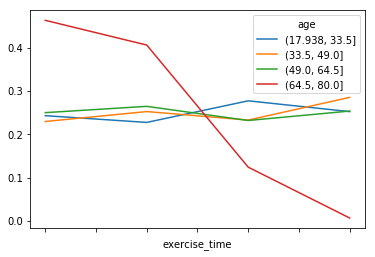

In [27]:
crosstab3 = pd.crosstab(exercise_bins,age_bins, normalize='columns')
df_stats(crosstab3)
crosstab3.plot();

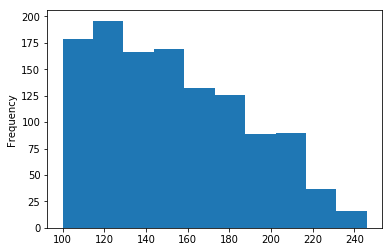

In [40]:
#weight appears to be the outcome given it's uneven distribution. 

display(df["weight"].plot.hist());




### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

**A. Variables are all continuous, which is why bins were necessary per variable for proper visualization.**

2.  What are the relationships between the variables?

**A. Weight and age are inversely related to exercise time. As they increase, exercise time diminishes**

3.  Which relationships are "real", and which spurious?

**A. Relationship between age and exercise appear to be real because is a similar distribution of the data. Their relationship to weight is spurious because it is likely there is a mean weight for the sample data regardless of the inputs.** 


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)